In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import zipfile

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

https://bcourses.berkeley.edu/courses/1519998/assignments/8573838

# LEGALST 123 Problem Set 2: NY Arraignment Flight Risk Prediction

In [2]:
np.random.seed(0)

## I. Introduction

On January 1, 2020, a new bail lawLinks to an external site. restricting the circumstances under which pretrial detention and cash bail could be imposed went into effect in New York state. State legislators sought to lower the population of people who were jailed because they could not afford bail before their trial.

While well-intentioned, the legislation received criticism from people across the political spectrum. A common concern was that crime would increase as a result of these changes, despite a lack of data to support this claim. Subsequent reformsLinks to an external site., which went into effect on July 1, 2020, broadened the situations under which cash bail could be set.

Along with the policy changes, the first iteration of the law was accompanied by a mandate to collect pretrial release dataLinks to an external site.. This is the dataset we will be working with for this problem set, and it is similar to the data (with different dates) used by Kleinberg et al in “Human Decisions and Machine Predictions,” which we read in class.

ArraignmentsLinks to an external site. are hearings where defendants are presented with and respond to the charges against them. This is also where presiding judges decide whether to detain them and set bail. In this problem set, we will be predicting and analyzing judge predictions of defendant flight risk at arraignment hearings. We will focus on the Remanded_to_Jail_at_Arraign variable in the provided dataset to be a representation of this. By the end of this assignment, you will gain experience in the following:

Cleaning messy publicly available data and documenting your process clearly.
Applying and rationalizing different predictive modeling techniques for a given dataset.
Evaluating the relative performance of different models and justifying the selection of a particular model.
Comparing models against an external benchmark and contextualizing results.
Feel free to use the provided template notebook Download template notebookto get started. Ensure the random seed is set to 0. Note that New York State provides two Download twoversions Download versionsof the codebook, each with slightly different information.


In [3]:
# Downloaded the file directly from the website and uploaded on Jupyter for easier use.

zf = zipfile.ZipFile('PretrialReleaseDataExtractWeb.zip')
df = pd.read_csv(zf.open('Pretrial Release Data 2020 - 2022 6-30.csv'))

In [4]:
df.shape

(582981, 111)

## II. Data Cleaning


A.   “Leakage” is a term used in machine learning for when a model makes decisions using information that it would not actually have, resulting in unnaturally high performance. This is similar to what occurs when two variables have perfect collinearity. What would leakage look like in the context of this problem and dataset?

Any variable that has any information related to Remanded_to_Jail_at_Arraign variable. Basically any information that gives any hints to what the judge has decided such as rearrest.

B. Inspect the features in the dataset and their associated descriptions in the codebooks, then list the ones that must be removed to prevent leakage.

In [5]:
set(df.columns)

{'Age_at_Arrest',
 'Age_at_Crime',
 'App_Count_Arraign_to_Dispo_Detained',
 'App_Count_Arraign_to_Dispo_Released',
 'App_Count_Arraign_to_Dispo_Total',
 'Arraign Charge Category',
 'Arrest Year',
 'Arrest_Month',
 'Arrest_Type',
 'Bail_Made_Indicator',
 'Bail_Set_and_Not_Posted_at_Arraign',
 'Bail_Set_and_Posted_at_Arraign',
 'Case_Type',
 'Contact_Pretrial_Service_Agency',
 'County_Name',
 'Court_Name',
 'Court_ORI',
 'Court_Type',
 'DAT_WO_WS_Prior_to_Arraign',
 'Days_Arraign_Bail_Set_to_First_Posted',
 'Days_Arraign_Bail_Set_to_First_Release',
 'Days_Arraign_Remand_First_Released',
 'Days_Arraign_to_Dispo',
 'Def_Attended_Sched_Pretrials',
 'Dismissal_Reason',
 'Disposition_Date',
 'Disposition_Detail',
 'Disposition_Type',
 'District',
 'Docket_Status',
 'Electronic_Monitoring',
 'Ethnicity',
 'First_Arraign_Date',
 'First_Bail_Set_Cash',
 'First_Bail_Set_Credit',
 'First_Bench_Warrant_Date',
 'First_Insurance_Company_Bail_Bond',
 'First_Partially_Secured_App_Bond',
 'First_Partial

In [6]:
leakage_lst = ['ROR_at_Arraign',
                       'Bail_Set_and_Posted_at_Arraign',
                       'NMR_at_Arraign',
                       'Release Decision at Arraign',
                        'Representation_at_Securing_Order',
                        'Pretrial_Supervision_at_Arraign',
                       'Contact_Pretrial_Service_Agency',
                       'Electronic_Monitoring',
                       'Travel_Restrictions',
                       'Passport_Surrender',
                       'No_Firearms_or_Weapons',
                       'Maintain_Employment',
                        'Maintain_Housing',
                        'Maintain_School',
                       'Placement_in_Mandatory_Program',
                       'Removal_to_Hospital',
                       'Obey_Court_Conditions-Family_Offense',
                        'Obey_Order_of_Protection',
                       'Other_NMR',
                       'First_Bail_Set_Cash',
                        'First_Bail_Set_Credit',
                        'First_Bench_Warrant_Date',
                        'First_Insurance_Company_Bail_Bond',
                        'First_Partially_Secured_App_Bond',
                        'First_Partially_Secured_Surety_Bond',
                        'First_Secured_App_Bond',
                        'First_Secured_Surety_Bond',
                        'First_Unsecured_App_Bond',
                        'First_Unsecured_Surety_Bond',
                        'Partially_Secured_App_Bond_Perc',
                        'Partially_Secured_Surety_Bond_Perc',
                       'Bail_Made_Indicator',
                       'Warrant_Ordered_btw_Arraign_and_Dispo',
                       'DAT_WO_WS_Prior_to_Arraign',
                       'Non_Stayed_WO',
                        'Num_of_ROW',
                        'Num_of_Stayed_WO',
                        'rearrest',
                        'rearrest_date',
                        'rearrest_date_firearm',
                        'rearrest_firearm',
                       'Disposition_Detail',
                       'Days_Arraign_Bail_Set_to_First_Release',
                       'Disposition_Date',
                       'Days_Arraign_Bail_Set_to_First_Posted',
              'Days_Arraign_to_Dispo',
              'Days_Arraign_Remand_First_Released']

C. Drop the features identified above. Describe the null values in the dataset and how you chose to deal with them. Clean the remaining data.

First, dropping leakage features.

In [7]:
df = df.drop(columns = leakage_lst)

Now, lets take a look at columns that has nan values.

In [8]:
df.columns[df.isna().any()].tolist()

['Judge_Name',
 'Offense_Month',
 'Offense Year',
 'Arrest_Month',
 'Arrest Year',
 'Arrest_Type',
 'Top_Arrest_Law',
 'Top_Arrest_Article_Section',
 'Top_Charge_at_Arrest',
 'Top_Charge_Severity_at_Arrest',
 'Top_Charge_Weight_at_Arrest',
 'Top_Arraign_Law',
 'Top_Arraign_Article_Section',
 'Top_Arraign_Attempt_Indicator',
 'Top_Charge_at_Arraign',
 'Top_Charge_Weight_at_Arraign',
 'Representation_Type',
 'Def_Attended_Sched_Pretrials',
 'Order_of_Protection',
 'Most_Severe_Sentence',
 'Top_Conviction_Law',
 'Top_Conviction_Article_Section',
 'Top_Charge_at_Conviction',
 'Top_Charge_Severity_at_Conviction',
 'Top_Charge_Weight_at_Conviction',
 'UCMSLiveDate',
 'prior_vfo_cnt',
 'prior_nonvfo_cnt',
 'prior_misd_cnt',
 'pend_vfo',
 'pend_nonvfo',
 'pend_misd',
 'supervision',
 'arr_cycle_id']

Imputing or removing null values should always be approached with caution. Any null values in criminal history related columns will be treated as no criminal history and be replaced with 0.0.

In [9]:
df[['Top_Arrest_Law',
    'Top_Arrest_Article_Section',
    'Top_Charge_at_Arrest',
    'Top_Charge_Severity_at_Arrest',
    'Top_Charge_Weight_at_Arrest',
    'Top_Arraign_Law',
    'Top_Arraign_Article_Section',
    'Top_Arraign_Attempt_Indicator',
    'Top_Charge_at_Arraign',
    'Top_Charge_Weight_at_Arraign',
    'Most_Severe_Sentence',
    'Top_Conviction_Law',
    'Top_Conviction_Article_Section',
    'Top_Charge_at_Conviction',
    'Top_Charge_Severity_at_Conviction',
    'Top_Charge_Weight_at_Conviction',
    'prior_vfo_cnt',
    'prior_nonvfo_cnt',
    'prior_misd_cnt',
    'pend_vfo',
    'pend_nonvfo',
    'pend_misd',
    'supervision',
    'arr_cycle_id',
    'UCMSLiveDate',
    'Representation_Type',
    'Order_of_Protection']] = df[['Top_Arrest_Law',
                           'Top_Arrest_Article_Section',
                           'Top_Charge_at_Arrest',
                           'Top_Charge_Severity_at_Arrest',
                           'Top_Charge_Weight_at_Arrest',
                           'Top_Arraign_Law',
                           'Top_Arraign_Article_Section',
                           'Top_Arraign_Attempt_Indicator',
                           'Top_Charge_at_Arraign',
                           'Top_Charge_Weight_at_Arraign',
                           'Most_Severe_Sentence',
                           'Top_Conviction_Law',
                           'Top_Conviction_Article_Section',
                           'Top_Charge_at_Conviction',
                           'Top_Charge_Severity_at_Conviction',
                           'Top_Charge_Weight_at_Conviction',
                           'prior_vfo_cnt',
                           'prior_nonvfo_cnt',
                           'prior_misd_cnt',
                           'pend_vfo',
                           'pend_nonvfo',
                           'pend_misd',
                           'supervision',
                           'arr_cycle_id',
                           'UCMSLiveDate',
                           'Representation_Type',
                           'Order_of_Protection']].fillna(0)


In [10]:
df['Def_Attended_Sched_Pretrials'].isna().sum() / len(df['Def_Attended_Sched_Pretrials'])

0.3710721275650493

In [11]:
len(df[df['prior_vfo_cnt'] == 0]) / len(df['prior_vfo_cnt'])

0.851122077734952

In [12]:
len(df[df['prior_nonvfo_cnt'] == 0]) / len(df['prior_nonvfo_cnt'])

0.7665978822637445

In [13]:
len(df[df['prior_misd_cnt'] == 0]) / len(df['prior_misd_cnt'])

0.5999612337280289

Above cells are showing that there are 37% null values on defendants' attendance on their pretrials. 85% of defendants never had prior convictions for violent felonies. 77% of defendants never had prior convictions for non-violent felony offenses. 45% of defendants never had prior convictions for misdemeanor offenses. With these information, it is likely that 60% null values on defendants' attendance on their pretrials are due to the fact that they do not have criminal history. Therefore, we will treat and replace them with 0.

In [14]:
df['Def_Attended_Sched_Pretrials'].fillna(0, inplace=True)

For Arrest_Type, all superior court cases will be 'N/A'.

In [15]:
df['Arrest_Type'].fillna('Superior', inplace=True)

The remaining columns are not considered leakage but also are not required to model the prediction. Hence, we will drop these columns.

In [16]:
not_important = df.columns[df.isna().any()].tolist()
df = df.drop(columns = not_important)

In [17]:
dummy = pd.get_dummies(df['Top_Charge_Severity_at_Conviction'], dtype=float)
df = pd.concat([df, dummy], axis=1)
df.rename(columns={0: 'No_Crime'}, inplace=True)

D. What should the timeframe of the dataset be if we’re interested in model predictions under the revised statute that reinstituted opportunities for cash bail? How do you address this in your data cleaning?

Since the reform went into effect on July 1, 2020, we will look at the data that are those dates and onwards in 'First_Arraign_Date'.

In [18]:
df['First_Arraign_Date'] = pd.to_datetime(df['First_Arraign_Date'])
df = df.loc[df['First_Arraign_Date'].between('2020-07-01', '2022-06-30')]

E. Partition the dataset into a training, validation, and test set. What proportions did you use? How did you scale the dataset?

Based on previous labs, the dataset will be partitioned in 60/20/20. Will be using MinMaxScaler scaling all numerical columns in [0,1] range.

In [19]:
# Abbreviating long columns names
column_mapping = {'App_Count_Arraign_to_Dispo_Released': 'ACADR',
                 'App_Count_Arraign_to_Dispo_Detained': 'ACARDD',
                 'App_Count_Arraign_to_Dispo_Total': 'ACADT',
                 'Def_Attended_Sched_Pretrials': 'DASP',
                 'Known_Days_in_Custody': 'KDC',
                 'Remanded_to_Jail_at_Arraign': 'Y'}
df.rename(columns=column_mapping, inplace=True)

In [20]:
df.columns = df.columns.astype(str)
df.loc[:, 'Y'] = df['Y'].replace({'N': 0, 'Y': 1})

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
df_performance = pd.concat([X_test, y_test], axis=1)

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))

numerical_colsxtr = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_colsxtr] = scaler.fit_transform(X_train[numerical_colsxtr])
X_train = X_train[numerical_colsxtr]

numerical_colsxv = X_val.select_dtypes(include=['int64', 'float64']).columns
X_val[numerical_colsxv] = scaler.fit_transform(X_val[numerical_colsxv])
X_val = X_val[numerical_colsxv]

numerical_colsxte = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test[numerical_colsxte] = scaler.fit_transform(X_test[numerical_colsxte])
X_test = X_test[numerical_colsxte]

## Feature Selection

A. Use computational methods discussed in labs to perform feature selection on your cleaned dataset. How does your feature selection technique work?

Typically, feature selection should be performed before splitting the data. For the sake of the order of questions being asked, I will go back to previous df before the train/test split and draw correlation of every numerical columns with heatmap.

,Age_at_Crime,Age_at_Arrest,ACADR,ACARDD,ACADT,DASP,Y,KDC,prior_vfo_cnt,prior_nonvfo_cnt,...,pend_vfo,pend_nonvfo,pend_misd,supervision,arr_cycle_id,No_Crime,Felony,Infraction,Misdemeanor,Violation
Age_at_Crime,1.000000,0.891521,0.020885,-0.019467,0.006980,0.052307,0.006391,-0.025880,0.149648,0.299146,...,-0.076972,-0.007784,0.020322,0.000070,0.082515,-0.031935,-0.025927,-0.006454,0.054489,0.022308
Age_at_Arrest,0.891521,1.000000,0.021588,-0.039673,-0.004356,0.074388,-0.021886,-0.047363,0.139982,0.272917,...,-0.071504,-0.005845,0.025164,-0.003755,0.123810,-0.000497,-0.110137,0.002828,0.047950,0.026217
ACADR,0.020885,0.021588,1.000000,-0.128547,0.809665,0.487109,-0.124879,-0.132047,-0.048247,-0.032606,...,-0.045949,-0.017603,0.033690,-0.059303,0.113543,0.000935,-0.031617,-0.086342,0.079393,0.031053
ACARDD,-0.019467,-0.039673,-0.128547,1.000000,0.477938,0.094461,0.238287,0.776682,0.171813,0.168172,...,0.152969,0.194814,0.176517,0.164352,0.071410,0.019999,0.139125,-0.116877,0.062277,-0.065954
ACADT,0.006980,-0.004356,0.809665,0.477938,1.000000,0.487358,0.030414,0.342687,0.058950,0.070649,...,0.049832,0.099705,0.134308,0.044741,0.142828,0.012669,0.054315,-0.145646,0.107180,-0.011527
DASP,0.052307,0.074388,0.487109,0.094461,0.487358,1.000000,-0.023082,-0.011801,-0.005952,0.005604,...,-0.007844,0.035006,0.076661,-0.003623,0.174950,0.005091,-0.189063,-0.053137,0.115717,0.062157
Y,0.006391,-0.021886,-0.124879,0.238287,0.030414,-0.023082,1.000000,0.207669,0.113046,0.151355,...,0.060024,0.058410,0.032214,0.108660,0.010644,0.002223,0.125465,-0.061919,0.023772,-0.047681
KDC,-0.025880,-0.047363,-0.132047,0.776682,0.342687,-0.011801,0.207669,1.000000,0.138533,0.120208,...,0.121843,0.129481,0.100579,0.133481,0.030474,0.007868,0.156321,-0.082644,0.022343,-0.055033
prior_vfo_cnt,0.149648,0.139982,-0.048247,0.171813,0.058950,-0.005952,0.113046,0.138533,1.000000,0.322407,...,0.085025,0.108526,0.093208,0.294575,0.134541,0.027641,0.029375,-0.104432,0.033086,0.010339
prior_nonvfo_cnt,0.299146,0.272917,-0.032606,0.168172,0.070649,0.005604,0.151355,0.120208,0.322407,1.000000,...,0.048821,0.188212,0.165490,0.236024,0.151550,-0.006655,0.050944,-0.125991,0.088585,0.018803


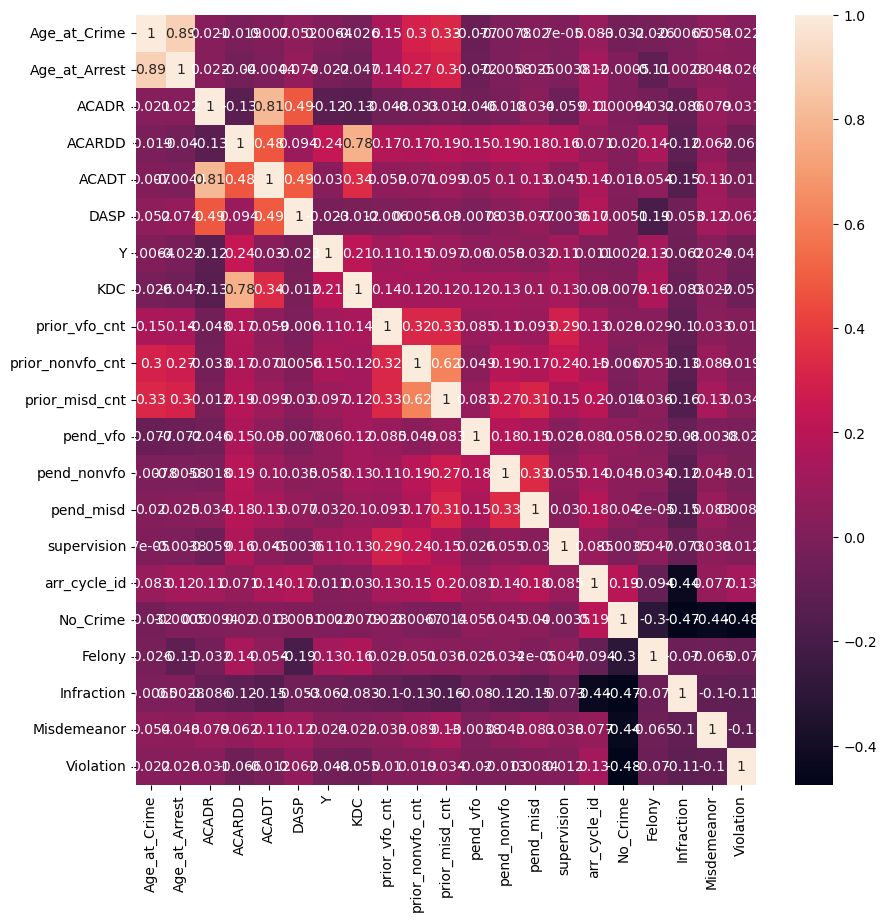

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_corr = df[numerical_cols].corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(df_corr, annot=True)
df_corr

In [23]:
df_corr.iloc[6]

Age_at_Crime        0.006391
Age_at_Arrest      -0.021886
ACADR              -0.124879
ACARDD              0.238287
ACADT               0.030414
DASP               -0.023082
Y                   1.000000
KDC                 0.207669
prior_vfo_cnt       0.113046
prior_nonvfo_cnt    0.151355
prior_misd_cnt      0.097449
pend_vfo            0.060024
pend_nonvfo         0.058410
pend_misd           0.032214
supervision         0.108660
arr_cycle_id        0.010644
No_Crime            0.002223
Felony              0.125465
Infraction         -0.061919
Misdemeanor         0.023772
Violation          -0.047681
Name: Y, dtype: float64

B. Pick three interesting features you selected using computational techniques. Why does it make sense to use each of them as predictors?

I will be using the following features:

ACARDD (0.238287)

Felony (0.125465)

Infraction (-0.061919)


ACARDD and Infraction are the highest correlation to our target variable Y (Remanded_to_Jail_at_Arraign). ACARDD being strong positive and Infraction being strong negative. When selecting features in correlation, it is a good idea to select high positive and negative features for many reasons but mainly to get a more accurate prediction. It makes sense to use these features as they conceptually make sense. The higher appearances to court, the more likely to cause crime again (ACARDD) and should be remanded. If the top charge was a felony (Felony), there is a strong indication that the defendant is dangerous (highest offense level) and should be remanded. If the top charge was an infraction (Infraction), it would be the opposite of a felony and the defendant should not be remanded.

## Prediction

A. Simulate the performance of a baseline model that predicts that judges will release every defendant. Report the percent accuracy and normalized confusion matrix.

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

X_test_baseline = X_test.copy()
X_test_baseline['Y'] = 0

y_actual = y_test.to_numpy()
y_pred = X_test_baseline['Y'].to_numpy()
accuracy = accuracy_score(y_actual, y_pred)
percent_accuracy = accuracy * 100

confusion = confusion_matrix(y_actual, y_pred, normalize='all')

print(f'Percent Accuracy: {percent_accuracy:.2f}%')
print('Normalized Confusion Matrix:')
print(confusion)

Percent Accuracy: 96.65%
Normalized Confusion Matrix:
[[0.96647811 0.        ]
 [0.03352189 0.        ]]


B & C. Choose three different prediction techniques that are appropriate to the problem at hand. Describe the basic mechanism of each, benefits and drawbacks, and any other criteria you factored into your decision. Why is each a reasonable choice for this context? Train your three models. Report the percent accuracy and normalized confusion matrix for each model. Which model do you end up selecting to make your prediction and why?

Here are the three prediction modeling that I will be using:

#### Logistic Regression

Logistic regression is a type of linear regression that is used for binary classification problems, where the goal is to predict the probability of an event occurring based on input features. Logistic regression works by fitting a logistic function to the input features, which maps the input space to a probability space between 0 and 1. Benefits of logistic regression include its simplicity, interpretability, and ability to handle large datasets. Drawbacks include its assumption of linearity between input features and the log-odds of the event, and its sensitivity to outliers.

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
confusion_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9621053060725279
Confusion Matrix:
 [[94165   671]
 [ 3047   231]]


#### Random Forest

Random forest is a technique that combines multiple decision trees to make predictions. Each tree in the forest is built on a random subset of the data and a random subset of the features, which helps to reduce overfitting and improve generalization performance. Benefits of random forest include its ability to capture non-linear relationships between input features and the target variable, handle missing data, and handle categorical variables without the need for one-hot encoding. Drawbacks include its potential for overfitting if the number of trees in the forest is too high, and its lack of interpretability compared to logistic regression.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
confusion_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9674052632651813
Confusion Matrix:
 [[94309   527]
 [ 2671   607]]


#### Decision Tree

Decision tree is a type of tree-based model that recursively splits the data based on input features to make predictions. Each split is made based on a criterion that maximizes the homogeneity of the resulting sub-trees. Benefits of decision tree include its simplicity, interpretability, and ability to handle non-linear relationships between input features and the target variable. Drawbacks include its tendency to overfit the data, especially when the tree is deep, and its sensitivity to small changes in the input data.

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
confusion_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9428012312208247
Confusion Matrix:
 [[91334  3502]
 [ 2110  1168]]


Logistic regression achieved an accuracy of 0.962, with a low number of false positives and false negatives. Random forest outperformed with the highest accuracy of 0.967, exhibiting a lower number of false positives and false negatives compared to logistic regression. Despite its slightly lower accuracy of 0.943, decision tree also showed promise with its ability to capture non-linear relationships.These three prediction techniques are reasonable choices as they are commonly used for binary classification problems. Logistic regression is due to its simplicity and interpretability, while random forest and decision tree is for capturing non-linear relationships between input features and the target variable.

D. Tune your model selection to improve performance. What hyperparameters do you end up using? List the percent accuracy and normalized confusion matrix of your final model.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
confusion_matrix = confusion_matrix(y_val, y_pred, normalize='true')

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion_matrix)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy:  0.9669466131235094
Confusion Matrix: 
 [[0.99385255 0.00614745]
 [0.81147041 0.18852959]]


E. Is it reasonable to perform cross-validation with this model? Why or why not?

Cross-validation is reasonable due to limited data and the need for hyperparameter tuning. Cross-validation helps to address the challenge of data scarcity, as it allows for the use of all available data for both training and evaluation purposes. By splitting the data into multiple folds and repeatedly training and evaluating the model on different subsets of the data, cross-validation provides a more reliable estimate of model performance. Furthermore, cross-validation is essential for unbiased hyperparameter tuning. It allows for the evaluation of different hyperparameter settings on different subsets of the data, which helps to identify the optimal combination of hyperparameters that generalizes well to unseen data. Without cross-validation, there is a risk of overfitting the hyperparameters to the limited training data, leading to poor model performance on unseen data.

## Interpretability
A. Create a dataframe that can be used to analyze your model’s performance, especially relative to judges. This should contain (1) all the features the model was trained on, (2) the judge’s arraignment release decision, (3) the probability score of the data point computed by the model, and (4) the model’s ultimate prediction.

    Note: #3 can be done using the predict_proba method in scikit-learn. It functions similarly to predict but returns a numeric score rather than a class

In [29]:
res = df_performance.copy()
proba_scores = logreg.predict_proba(X_test)[:, 1]
res['Model_Probability_Score'] = proba_scores

model_predictions = (proba_scores >= 0.5).astype(int)
res['Model_Prediction'] = model_predictions

res = res[['ACARDD', 'Felony', 'Infraction', 'Y', 'Model_Probability_Score', 'Model_Prediction']]
res

,ACARDD,Felony,Infraction,Y,Model_Probability_Score,Model_Prediction
522638,0,0.0,0.0,0,0.003899,0
369399,2,0.0,0.0,0,0.099876,0
436116,0,0.0,0.0,0,0.004641,0
383695,5,0.0,0.0,0,0.166444,0
7524,0,0.0,0.0,0,0.013306,0
...,...,...,...,...,...,...
461579,0,0.0,0.0,0,0.035103,0
216903,0,0.0,0.0,0,0.006804,0
496490,0,0.0,0.0,0,0.027990,0
222532,4,0.0,0.0,0,0.175143,0


B. Summary Statistics: Compute the average judge decision, model probability score, and model prediction for 1) all cases, 2) cases with black defendants, 3) cases with non-black defendants, 4) cases with male defendants, 5) cases with non-male defendants, 6) cases with defendants at or above the median age, and 7) cases with defendants below the median age. What do you observe about race, gender, and age differences for these scores? Include several visualizations to help your audience understand the group differences.

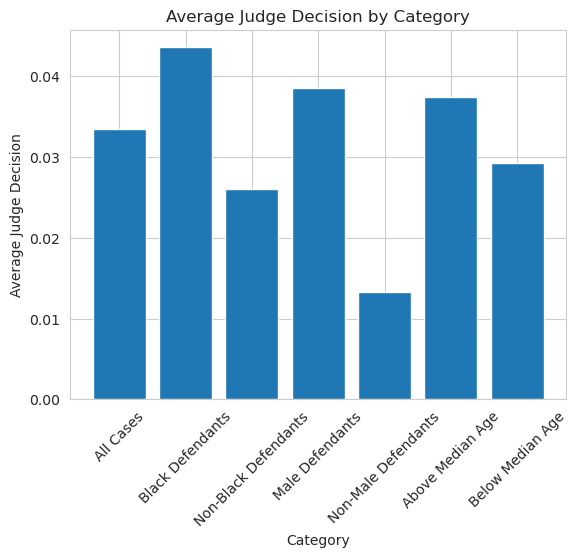

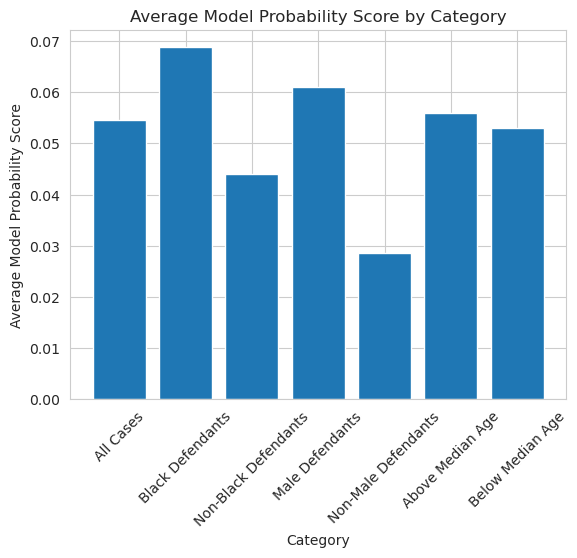

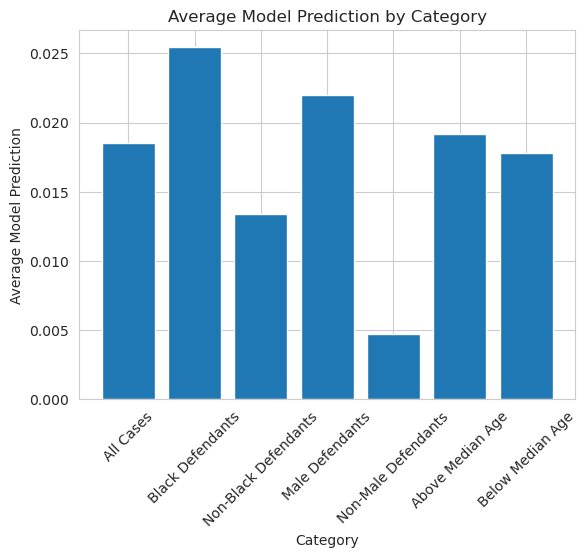

In [30]:
df_performance['Model_Probability_Score'] = proba_scores
df_performance['Model_Prediction'] = model_predictions
avg_all_cases = df_performance[['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

avg_black_defendants = df_performance[df_performance['Race'] == 'Black'][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

avg_non_black_defendants = df_performance[df_performance['Race'] != 'Black'][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

avg_male_defendants = df_performance[df_performance['Gender'] == 'Male'][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

avg_non_male_defendants = df_performance[df_performance['Gender'] != 'Male'][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

median_age = df_performance['Age_at_Crime'].median()

avg_above_median_age = df_performance[df_performance['Age_at_Crime'] >= median_age][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

avg_below_median_age = df_performance[df_performance['Age_at_Crime'] < median_age][['Y', 'Model_Probability_Score', 'Model_Prediction']].mean()

sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax.bar(['All Cases', 'Black Defendants', 'Non-Black Defendants', 'Male Defendants', 'Non-Male Defendants', 'Above Median Age', 'Below Median Age'],
       [avg_all_cases['Y'], avg_black_defendants['Y'], avg_non_black_defendants['Y'], avg_male_defendants['Y'], avg_non_male_defendants['Y'], avg_above_median_age['Y'], avg_below_median_age['Y']])
ax.set_ylabel('Average Judge Decision')
ax.set_xlabel('Category')
ax.set_title('Average Judge Decision by Category')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots()
ax.bar(['All Cases', 'Black Defendants', 'Non-Black Defendants', 'Male Defendants', 'Non-Male Defendants', 'Above Median Age', 'Below Median Age'],
       [avg_all_cases['Model_Probability_Score'], avg_black_defendants['Model_Probability_Score'], avg_non_black_defendants['Model_Probability_Score'], avg_male_defendants['Model_Probability_Score'], avg_non_male_defendants['Model_Probability_Score'], avg_above_median_age['Model_Probability_Score'], avg_below_median_age['Model_Probability_Score']])
ax.set_ylabel('Average Model Probability Score')
ax.set_xlabel('Category')
ax.set_title('Average Model Probability Score by Category')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots()
ax.bar(['All Cases', 'Black Defendants', 'Non-Black Defendants', 'Male Defendants', 'Non-Male Defendants', 'Above Median Age', 'Below Median Age'],
       [avg_all_cases['Model_Prediction'], avg_black_defendants['Model_Prediction'], avg_non_black_defendants['Model_Prediction'], avg_male_defendants['Model_Prediction'], avg_non_male_defendants['Model_Prediction'], avg_above_median_age['Model_Prediction'], avg_below_median_age['Model_Prediction']])
ax.set_ylabel('Average Model Prediction')
ax.set_xlabel('Category')
ax.set_title('Average Model Prediction by Category')
plt.xticks(rotation=45)
plt.show();

C. What are three features with significant predictive value in your model? Explain why this might be the case. This can be determined using the coef_ or feature_importances_ methods, depending on the model you chose.

I can use the coef_ attribute to determine the coefficients of the features in logistic regression model, which can give an indication of their predictive value.

#### Three predictive features:

Model_Probability_Score: This feature represents the probability score predicted by the model for each case. Since logistic regression is a probabilistic model that estimates the probability of an outcome (in this case, the judge decision), the Model_Probability_Score is likely to be an important feature with significant predictive value. Higher values of this feature indicate higher predicted probabilities of a certain judge decision, which can strongly influence the final decision.

Model_Prediction: This feature represents the binary prediction made by the model for each case. In a logistic regression model, this prediction is based on the estimated probabilities and a decision threshold. The Model_Prediction is likely to be an important feature as it directly represents the final decision made by the model, which can have significant predictive value. This feature can also capture any biases or patterns learned by the model in making binary predictions.

Race: This categorical feature represents the race of the defendant. In many real-world scenarios, race can unfortunately be associated with bias and discrimination, and it can have a significant impact on the judge's decision. Therefore, it is likely that the Race feature has significant predictive value in the model, as it captures the racial information of the defendant, which can influence the judge's decision-making process.

## Compare to Judge Decisions
A. Judges have access to basic risk assessment tools when making detention decisions. For this section, we will interpret the model probability scores as the failure-to-appear risk. What is the average risk score for the riskiest 1% of defendants? What percent of these do judges detain? What is the average risk score for the least risky 1% of defendants? What percent of these do judges detain? Overall, do judge decisions seem to align with the perceived risk of the defendant?

In [31]:
riskiest_1_percent = df_performance.sort_values('Model_Probability_Score', ascending=False).head(int(len(df_performance) * 0.01))
avg_risk_score_riskiest_1_percent = riskiest_1_percent['Model_Probability_Score'].mean()

least_risky_1_percent = df_performance.sort_values('Model_Probability_Score', ascending=True).head(int(len(df_performance) * 0.01))
avg_risk_score_least_risky_1_percent = least_risky_1_percent['Model_Probability_Score'].mean()

percent_detained_riskiest_1_percent = (riskiest_1_percent['Y'] == 1).mean() * 100
percent_detained_least_risky_1_percent = (least_risky_1_percent['Y'] == 1).mean() * 100

print("Average risk score for the riskiest 1% of defendants:", avg_risk_score_riskiest_1_percent)
print("Percentage of defendants detained in the riskiest 1%:", percent_detained_riskiest_1_percent, "%")
print("Average risk score for the least risky 1% of defendants:", avg_risk_score_least_risky_1_percent)
print("Percentage of defendants detained in the least risky 1%:", percent_detained_least_risky_1_percent, "%")

Average risk score for the riskiest 1% of defendants: 0.8427973539563465
Percentage of defendants detained in the riskiest 1%: 24.464831804281346 %
Average risk score for the least risky 1% of defendants: 0.00014495152322530647
Percentage of defendants detained in the least risky 1%: 0.10193679918450561 %


B. Now examine the cases where judge decisions and model predictions do not align. What features are associated with false positives in the model? False negatives? What does that say about how judges’ perception of risk for varies across cases?

In [35]:
false_positives = df_performance[(df_performance['Model_Prediction'] == 1) & (df_performance['Y'] == 0)]
false_negatives = df_performance[(df_performance['Model_Prediction'] == 0) & (df_performance['Y'] == 1)]

valid_columns_fp = false_positives.drop(['Model_Prediction', 'Y'], axis=1).select_dtypes(include='number')
features_fp_mean = valid_columns_fp.mean()

valid_columns_fn = false_negatives.drop(['Model_Prediction', 'Y'], axis=1).select_dtypes(include='number')
features_fn_mean = valid_columns_fn.mean()

print("Features associated with false positives:")
print(features_fp_mean)
print("Features associated with false negatives:")
print(features_fn_mean)

Features associated with false positives:
Age_at_Crime                   34.441910
Age_at_Arrest                  31.062723
ACADR                           0.604419
ACARDD                         11.404134
ACADT                          12.008553
DASP                            2.176051
KDC                           302.420527
prior_vfo_cnt                   0.667142
prior_nonvfo_cnt                1.498218
prior_misd_cnt                  3.976479
pend_vfo                        0.240200
pend_nonvfo                     0.347826
pend_misd                       0.342837
supervision                     0.316465
arr_cycle_id               534247.355666
No_Crime                        0.509622
Felony                          0.355666
Infraction                      0.000000
Misdemeanor                     0.130435
Violation                       0.004277
Model_Probability_Score         0.718479
dtype: float64
Features associated with false negatives:
Age_at_Crime                   34.985043

The analysis of false positives and false negatives in the model's predictions suggests that judges' perception of risk may vary across cases. False positives, where the model predicted a high risk of 'failure-to-appear' but the defendant was not detained, may be associated with defendants who have lower average values of certain features such as age, prior criminal history, and pending cases. False negatives, where the model predicted a low risk of 'failure-to-appear' but the defendant was detained, may be associated with defendants who have higher average values of certain features. This suggests that judges may consider additional factors beyond the model's risk scores when making detention decisions, potentially leading to discrepancies between the model and judges' decisions. This highlights the complexity of judicial decision-making and the potential for judges to have varying perceptions of risk in different cases.